In [133]:
import cv2,os

data_path='Vedic dataset'

In [134]:
categories=os.listdir(data_path)

In [135]:
labels=[i for i in range(len(categories))]

label_dict=dict(zip(categories,labels)) 

print(label_dict)
print(categories)
print(labels)

{'Vedic symbols': 0, 'Vedic worshipping  device': 1}
['Vedic symbols', 'Vedic worshipping  device']
[0, 1]


In [136]:
img_size=100
data=[]
target=[]


for category in categories:
    folder_path=os.path.join(data_path,category)
    img_names=os.listdir(folder_path)
        
    for img_name in img_names:
        img_path=os.path.join(folder_path,img_name)
        img=cv2.imread(img_path)

        try:
            gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)           
           
            resized=cv2.resize(gray,(img_size,img_size))
          
            data.append(resized)
            target.append(label_dict[category])
           
        except Exception as e:
            print('Exception:',e)


In [137]:
import numpy as np

data=np.array(data)/255.0
data=np.reshape(data,(data.shape[0],img_size,img_size,1))
target=np.array(target)

from keras.utils import np_utils

new_target=np_utils.to_categorical(target)

In [138]:
np.save('data',data)
np.save('target',new_target)

In [139]:
import numpy as np

data=np.load('data.npy')
target=np.load('target.npy')

In [140]:
target.shape, data.shape  #category in target#

((3389, 2), (3389, 100, 100, 1))

In [141]:
import random
random.shuffle(data)

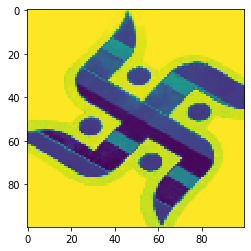

In [142]:
import matplotlib.pyplot as plt
%matplotlib inline
X1=data.reshape(data.shape[0],img_size,img_size)
plt.imshow(X1[100]) 
plt.show() 

In [143]:
target[1],X1[100]

(array([1., 0.], dtype=float32),
 array([[1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        ...,
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.],
        [1., 1., 1., ..., 1., 1., 1.]]))